# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision = 2)

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)
y = y.reshape(len(y), 1)
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [6]:
print(x)

[[-1.57]
 [-1.22]
 [-0.87]
 [-0.52]
 [-0.17]
 [ 0.17]
 [ 0.52]
 [ 0.87]
 [ 1.22]
 [ 1.57]]


In [7]:
print(y)

[[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]


## Training the SVR model on the whole dataset

In [8]:
from sklearn.svm import SVR
svreg = SVR(kernel='rbf')
svreg.fit(x, y.reshape(len(y)))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [9]:
y_pred = sc_y.inverse_transform(svreg.predict(sc_x.transform([[6.5]])))
print(y_pred)

[170370.02]


## Visualising the SVR results

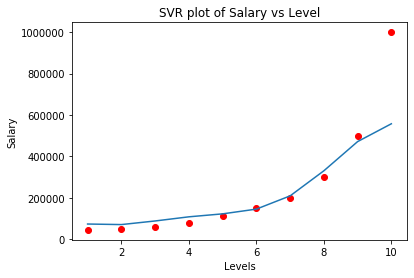

In [10]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color ='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(svreg.predict(x)))
plt.title("SVR plot of Salary vs Level")
plt.xlabel("Levels")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

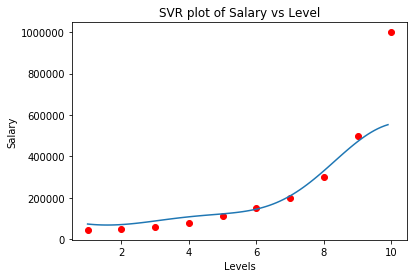

In [11]:
X_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color ='red')
plt.plot(X_grid, sc_y.inverse_transform(svreg.predict(sc_x.transform(X_grid))))
plt.title("SVR plot of Salary vs Level")
plt.xlabel("Levels")
plt.ylabel("Salary")
plt.show()